In [1]:
# -*- coding: utf-8 -*-
from app.BinanceAPI import BinanceAPI
from app.authorization import api_key, api_secret
from data.runBetData import RunBetData
from app.dingding import Message
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib widget
# %matplotlib inline

In [3]:
binan = BinanceAPI(api_key, api_secret)
runbet = RunBetData()
msg = Message()

# 实验同一交易对的现货和永续合约间的差价套现

In [3]:
time_start = time.time()
spot_data = binan.get_spot_ticker_data('ETHUSDT')
future_data = binan.get_future_ticker_data('ETHUSDT')
time_end = time.time()
print('spot: ' + str(spot_data))
print('future: ' + str(future_data))
print('Server time: %s' % binan.timestamp_to_date(future_data['time']))
print('time cost', time_end - time_start, 's')

spot: {'symbol': 'ETHUSDT', 'price': '2690.17000000'}
future: {'symbol': 'ETHUSDT', 'price': '2689.37', 'time': 1622966271642}
Server time: 2021-06-06 15:57:51
time cost 1.779989242553711 s


In [4]:
spot_kline_1m_data = np.array(binan.get_spot_klines('ETHUSDT', '1h', limit=500)).astype(float)
future_kline_1m_data = np.array(binan.get_future_klines('ETHUSDT', '1h', limit=500)).astype(float)

In [5]:
time_spot = spot_kline_1m_data[:,6]/1000/60/60
price_end_spot = spot_kline_1m_data[:,4]
time_future = future_kline_1m_data[:,6]/1000/60/60
price_end_future = future_kline_1m_data[:,4]

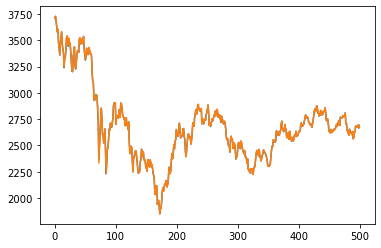

In [6]:
plt.figure()
plt.plot(time_spot-np.min(time_spot),price_end_spot)
plt.plot(time_future-np.min(time_spot),price_end_future)

In [7]:
time_spot[-1]-time_future[-1]

0.0

In [8]:
time_future[0]

450324.99999972223

In [9]:
print('Server time: %s' % binan.timestamp_to_date(time_future[-1]*60000*15))

Server time: 1982-11-10 09:59:59


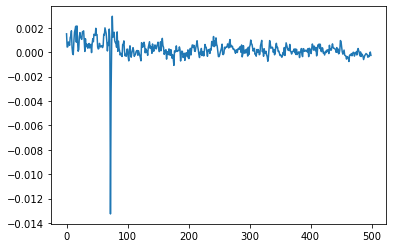

In [10]:
plt.figure()
plt.plot(time_spot-np.min(time_spot),price_end_future/price_end_spot-1)

In [11]:
tmp = price_end_future/price_end_spot

In [12]:
tmp2 = tmp/np.max(tmp)

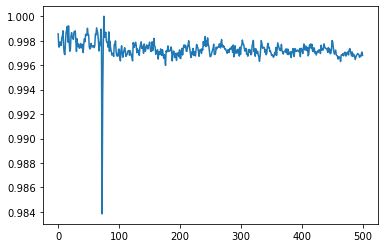

In [13]:
plt.figure()
plt.plot(tmp2)

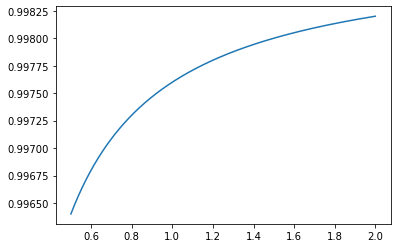

In [26]:
spot_fee_rate = 0.1/100
future_fee_rate = 0.02/100
p_spot_incr_rate = np.linspace(0.5, 2, 1000)
k_up_bound = (1-spot_fee_rate-(spot_fee_rate+future_fee_rate)/p_spot_incr_rate)/(1+future_fee_rate)
plt.figure()
plt.plot(p_spot_incr_rate,k_up_bound)

# 实验两个关联度较高的交易对的永续合约间差价套现

In [4]:
spot_fee_rate = 0.02/100 # 做多
future_fee_rate = 0.02/100 # 做空
p_spot_incr_rate = np.linspace(0.5, 2, 1000)
k_up_bound = (1-spot_fee_rate-(spot_fee_rate+future_fee_rate)/p_spot_incr_rate)/(1+future_fee_rate)
plt.figure()
plt.plot(p_spot_incr_rate,k_up_bound)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
k = 0.999
roe = (p_spot_incr_rate*(1-k-spot_fee_rate-future_fee_rate*k)-spot_fee_rate-future_fee_rate)/2
plt.figure()
plt.plot(p_spot_incr_rate,roe)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

**多头行情对套利更好**

In [42]:
spot_kline_1m_data =  pd.DataFrame(binan.get_future_klines('BTCUSDT', '1m', limit=499)).astype(float)
future_kline_1m_data =  pd.DataFrame(binan.get_future_klines('ETHUSDT', '1m', limit=499)).astype(float)

In [55]:
time_spot = spot_kline_1m_data.iloc[:,6]/1000/60
price_end_spot = spot_kline_1m_data.iloc[:,4]
time_future = future_kline_1m_data.iloc[:,6]/1000/60
price_end_future = future_kline_1m_data.iloc[:,4]

In [56]:
time_spot

0      2.704914e+07
1      2.704914e+07
2      2.704914e+07
3      2.704914e+07
4      2.704914e+07
           ...     
494    2.704963e+07
495    2.704963e+07
496    2.704963e+07
497    2.704964e+07
498    2.704964e+07
Name: 6, Length: 499, dtype: float64

In [59]:
plt.figure()
plt.plot(price_end_spot/np.max(price_end_spot))
plt.plot(price_end_future/np.max(price_end_future))
plt.legend(['BTC','ETH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
tmp = 1/(price_end_future/price_end_spot)

In [65]:
tmp.iloc[-1]

13.277362190159083

In [61]:
print(df.head)

<bound method NDFrame.head of              0
0    13.474479
1    13.463011
2    13.472695
3    13.465955
4    13.459257
..         ...
494  13.276866
495  13.272509
496  13.269651
497  13.277732
498  13.269845

[499 rows x 1 columns]>


In [39]:
def Bolinger_Bands(stock_price, window_size, num_of_std):

    rolling_mean = stock_price.rolling(window=window_size).mean()
    rolling_std  = stock_price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)

    return rolling_mean, upper_band, lower_band



In [40]:
rolling_avg_price, upper_band, lower_band = Bolinger_Bands(df, 20, 2)

In [80]:
lower_band.iloc[-1,0]

13.261150779315688

In [81]:
lower_band.iloc[-1]

0    13.261151
Name: 498, dtype: float64

In [41]:
plt.figure()
plt.plot(tmp)
plt.plot(rolling_avg_price)
plt.plot(upper_band)
plt.plot(lower_band)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [102]:
tmp2 = tmp/np.max(tmp)

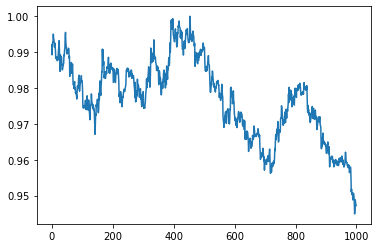

In [103]:
plt.figure()
plt.plot(tmp2)

In [104]:
0.0715/0.0735

0.9727891156462585

In [106]:
1.01**(2*60/5)

1.2697346485319148